<a href="https://colab.research.google.com/github/donghwi2022/ds-sa-cp02/blob/%EC%8B%A0%EB%8F%99%ED%9C%98/ds_sa_cp2_%EC%8B%A0%EB%8F%99%ED%9C%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 필요 라이브러리 import

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 2. 사용 데이터 확인

In [3]:
df = pd.read_csv("/content/movie_ratings.csv", index_col = 0)
df.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,unknown,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,305,242,5,886307828,23,M,programmer,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,242,4,883268170,42,M,executive,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,891033261,60,M,retired,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,63,242,3,875747190,31,M,marketing,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      100000 non-null  int64 
 1   movie_id     100000 non-null  int64 
 2   rating       100000 non-null  int64 
 3   timestamp    100000 non-null  int64 
 4   age          100000 non-null  int64 
 5   gender       100000 non-null  object
 6   occupation   100000 non-null  object
 7   unknown      100000 non-null  int64 
 8   Action       100000 non-null  int64 
 9   Adventure    100000 non-null  int64 
 10  Animation    100000 non-null  int64 
 11  Children's   100000 non-null  int64 
 12  Comedy       100000 non-null  int64 
 13  Crime        100000 non-null  int64 
 14  Documentary  100000 non-null  int64 
 15  Drama        100000 non-null  int64 
 16  Fantasy      100000 non-null  int64 
 17  Film-Noir    100000 non-null  int64 
 18  Horror       100000 non-null  int64 
 19  Mus

In [7]:
# 중복값 확인
df.duplicated().sum()

0

In [66]:
# 행당 순서의 열에 있는 값들을 확인하는 함수
def unique_value(col_index) :
    result = df.iloc[:, col_index].unique()
    result.sort()
    print(f"유니크 값의 개수 : {len(result)}")
    print(f"유니크 값들 : {result}")
    return

In [67]:
unique_value(1)

유니크 값의 개수 : 1682
유니크 값들 : [   1    2    3 ... 1680 1681 1682]


# 3. 데이터 EDA

## 1. 유저별 평가 개수

In [49]:
df.groupby("user_id").size().sort_values()

user_id
202     20
441     20
685     20
34      20
36      20
      ... 
276    518
450    540
13     636
655    685
405    737
Length: 943, dtype: int64

## 2. 영화별 평가 개수

In [58]:
df.groupby("movie_id").size().sort_values()

movie_id
1682      1
814       1
1447      1
1593      1
1452      1
       ... 
294     485
181     507
100     508
258     509
50      583
Length: 1682, dtype: int64

## 3. 장르별 영화 개수

In [73]:
# 영화ID가 같은 데이터를 제거한 서브 데이터프레임 생성
sub_df = df.drop_duplicates(['movie_id'])
sub_df

,user_id,movie_id,rating,timestamp,age,gender,occupation,unknown,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117,196,393,4,881251863,49,M,writer,0,0,0,...,0,0,0,0,0,0,0,0,0,0
309,196,381,4,881251728,49,M,writer,0,0,0,...,0,0,0,0,0,1,0,0,0,0
409,196,251,3,881251274,49,M,writer,0,0,0,...,0,0,0,0,0,0,0,0,0,0
455,196,655,5,881251793,49,M,writer,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,863,1679,3,889289491,17,M,student,0,0,0,...,0,0,0,0,0,1,0,1,0,0
99996,863,1678,1,889289570,17,M,student,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,863,1680,2,889289570,17,M,student,0,0,0,...,0,0,0,0,0,1,0,0,0,0
99998,896,1681,3,887160722,28,M,writer,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
# 장르별 영화 개수를 나타낸 딕셔너리 생성
genre = {}
for index in range(7, 26) :
    genre_name = sub_df.columns[index]
    genre_count = len(sub_df[sub_df[genre_name] == 1])
    genre[genre_name] = genre_count

# 데이터프레임으로 변경
genre_df = pd.DataFrame({
    'genre_name' : genre.keys(),
    'number_of_movie' : genre.values()
})
genre_df

,genre_name,number_of_movie
0,unknown,2
1,Action,251
2,Adventure,135
3,Animation,42
4,Children's,122
5,Comedy,505
6,Crime,109
7,Documentary,50
8,Drama,725
9,Fantasy,22


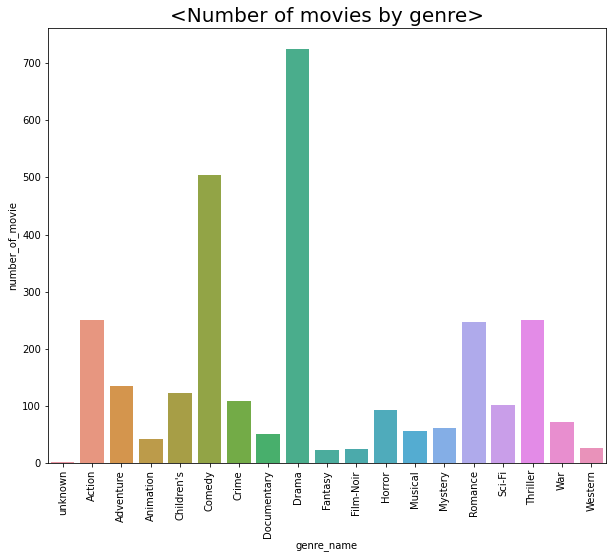

In [120]:
plt.figure(figsize=(10, 8))
plt.title('<Number of movies by genre>', fontsize=20)
sns.barplot(data= genre_df,x='genre_name', y='number_of_movie')
plt.xticks(rotation=90)
plt.show()

### +고려중
- 장르별 점수의 평균
- 장르별 평가 개수

# 4. 머신러닝 진행